# KNN（K近邻算法）

def KNeighborsClassifier(n_neighbors = 5,
                       weights='uniform',
                       algorithm = '',
                       leaf_size = '30',
                       p = 2,
                       metric = 'minkowski',
                       metric_params = None,
                       n_jobs = None
                       )
										
- n_neighbors：这个值就是指 KNN 中的 “K”了。前面说到过，通过调整 K 值，算法会有不同的效果。

- weights（权重）：最普遍的 KNN 算法无论距离如何，权重都一样，但有时候我们想搞点特殊化，比如距离更近的点让它更加重要。这时候就需要 weight 这个参数了，这个参数有三个可选参数的值，决定了如何分配权重。参数选项如下：
        • 'uniform'：不管远近权重都一样，就是最普通的 KNN 算法的形式。
        • 'distance'：权重和距离成反比，距离预测目标越近具有越高的权重。
        • 自定义函数：自定义一个函数，根据输入的坐标值返回对应的权重，达到自定义权重的目的。

- algorithm：在 sklearn 中，要构建 KNN 模型有三种构建方式，1. 暴力法，就是直接计算距离存储比较的那种放松。2. 使用 kd 树构建 KNN 模型 3. 使用球树构建。 其中暴力法适合数据较小的方式，否则效率会比较低。如果数据量比较大一般会选择用 KD 树构建 KNN 模型，而当 KD 树也比较慢的时候，则可以试试球树来构建 KNN。参数选项如下：
		• 'brute' ：蛮力实现
		• 'kd_tree'：KD 树实现 KNN
		• 'ball_tree'：球树实现 KNN 
		• 'auto'： 默认参数，自动选择合适的方法构建模型
不过当数据较小或比较稀疏时，无论选择哪个最后都会使用 'brute'
		
- leaf_size：如果是选择蛮力实现，那么这个值是可以忽略的，当使用KD树或球树，它就是是停止建子树的叶子节点数量的阈值。默认30，但如果数据量增多这个参数需要增大，否则速度过慢不说，还容易过拟合。
- p：和metric结合使用的，当metric参数是"minkowski"的时候，p=1为曼哈顿距离， p=2为欧式距离。默认为p=2。
- metric：指定距离度量方法，一般都是使用欧式距离。
		• 'euclidean' ：欧式距离
		• 'manhattan'：曼哈顿距离
		• 'chebyshev'：切比雪夫距离
		• 'minkowski'： 闵可夫斯基距离，默认参数
- n_jobs：指定多少个CPU进行运算，默认是-1，也就是全部都算。

### Load the data

In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

load_iris() - 模式识别领域著名的数据集，一共包括150行记录，其中前四列为花萼长度，花萼宽度，花瓣长度，花瓣宽度等4个用于识别鸢尾花的属性，第5列为鸢尾花的类别（包括Setosa，Versicolour，Virginica三类）

In [3]:
# as_frame 为 True，以 DataFrame 形式返回
iris = load_iris(as_frame=True)

In [4]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [5]:
iris.keys()  # 打印其包含的key

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
iris.data  # 特征值

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris.target  # 标签值

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [8]:
iris.target_names  # 标签名

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.feature_names  # 特征名

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

数据集构建 - X

In [28]:
X = iris.data
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


数据集构建 - y

In [29]:
y = iris.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

### 确定 K 值

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [30]:
k_range = range(1, 31)
k_error = []
# 循环，将k从1取到31，查看误差效果
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # cv参数决定数据集划分比例
    scores = cross_val_score(knn, X, y, cv=6, scoring="accuracy")
    k_error.append(1 - scores.mean())

画图，x 轴为 k 值，y 轴为误差值，可见 k 取 11 最佳

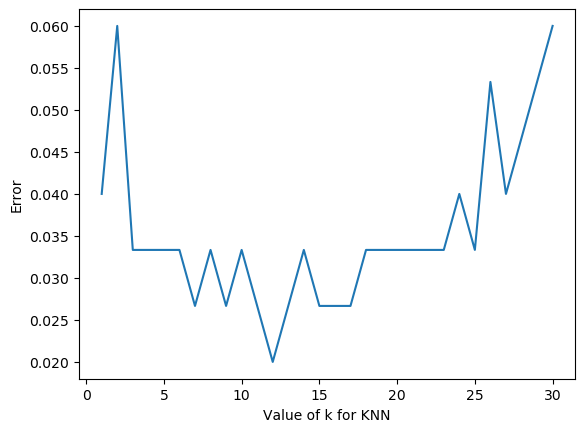

In [37]:
plt.plot(k_range, k_error)
plt.xlabel("Value of k for KNN")
plt.ylabel("Error")
plt.show()

### KNN 算法

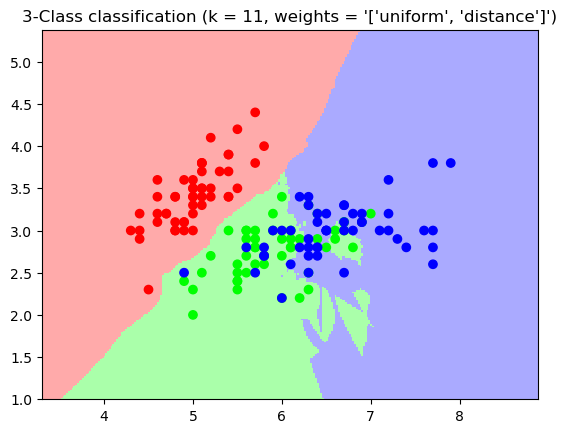

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, neighbors
from matplotlib.colors import ListedColormap

# 根据上面的交叉验证，取 k 为11
n_neighbors = 11

# 导入数据
iris = datasets.load_iris()

# 取前两个 feature，便于画图
x = iris.data[:, :2]
y = iris.target

# 讨论不同 weights 对结果的影响
weights = ["uniform", "distance"]

h = .02  # 网格中的步长

# 创建彩色的图
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weight in weights:
    cls = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weight)
    cls.fit(x, y)

    # 生成二维坐标点
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # 进行预测
    z = cls.predict(np.c_[xx.ravel(), yy.ravel()])

    # 将预测结果放入彩色图中
    z = z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)

    # 绘制训练点
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()
    